Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset

In [4]:
df = pd.read_csv('car_dataset.csv')


Checking dataset head

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Checking shape of dataset

In [7]:
df.shape

(11914, 16)

Checking info of data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Removing irrelevant columns

In [11]:
df = df.drop(columns=['Engine Fuel Type','Market Category','Vehicle Size','Vehicle Style','Popularity','Number of Doors'])

Checking row column size after dropping irrelevant columns

In [14]:
df.shape

(11914, 10)

In [15]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [20]:
df = df.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'DriveMode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'price'})

In [21]:
df.head()

,Make,Model,Year,HP,Cylinders,DriveMode,Driven_Wheels,MPG-H,MPG-C,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


Checking duplicates

In [24]:
dups = df[df.duplicated()]

In [25]:
dups.shape

(989, 10)

Removing duplicates

In [ ]:
df = df.drop_duplicates()

In [28]:
df.shape

(10925, 10)

Checking count of values in each column

In [29]:
df.count()

Make             10925
Model            10925
Year             10925
HP               10856
Cylinders        10895
DriveMode        10925
Driven_Wheels    10925
MPG-H            10925
MPG-C            10925
price            10925
dtype: int64

Checking count of null values in each column

In [31]:
df.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
DriveMode         0
Driven_Wheels     0
MPG-H             0
MPG-C             0
price             0
dtype: int64

Dropping null values from dataframe

In [ ]:
df.dropna(inplace=True)
#to handle missing value fillna could have been used as well

Checking count of items in each column

In [35]:
df.count()

Make             10827
Model            10827
Year             10827
HP               10827
Cylinders        10827
DriveMode        10827
Driven_Wheels    10827
MPG-H            10827
MPG-C            10827
price            10827
dtype: int64

In [44]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

print('any value in price below ',lower_bound, 'and above ',upper_bound, 'is treated as outlier')

21327.5
any value in price below  -10018.75 and above  75291.25 is treated as outlier


<Axes: xlabel='price'>

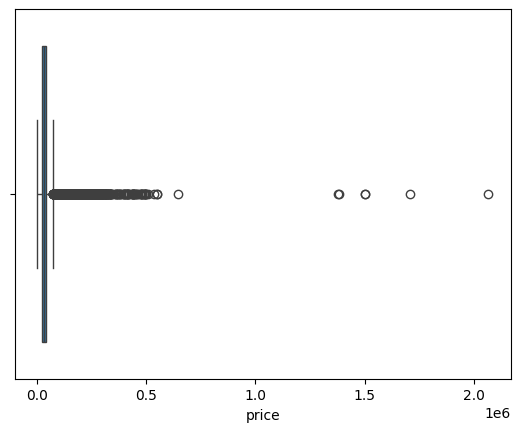

In [42]:
sns.boxplot(x = df['price'])

Text(0.5, 0, 'Make')

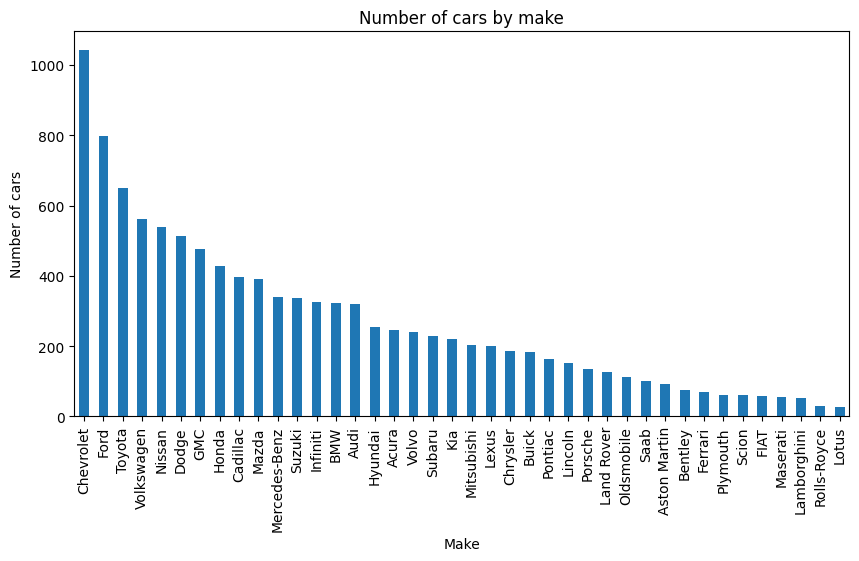

In [ ]:
df['Make'].value_counts().nlargest(40).plot(kind = 'bar', figsize = (10,5))
plt.title("Number of cars by make")
plt.ylabel("Number of cars")
plt.xlabel('Make')


In [ ]:
#Checking how many unique makers are there
len(df['Make'].unique())

47

# Correlation and Heatmap

               Year        HP  Cylinders     MPG-H     MPG-C     price
Year       1.000000  0.314971  -0.050598  0.284237  0.234135  0.196789
HP         0.314971  1.000000   0.788007 -0.420281 -0.473551  0.659835
Cylinders -0.050598  0.788007   1.000000 -0.611576 -0.632407  0.554740
MPG-H      0.284237 -0.420281  -0.611576  1.000000  0.841229 -0.209150
MPG-C      0.234135 -0.473551  -0.632407  0.841229  1.000000 -0.234050
price      0.196789  0.659835   0.554740 -0.209150 -0.234050  1.000000


<Axes: >

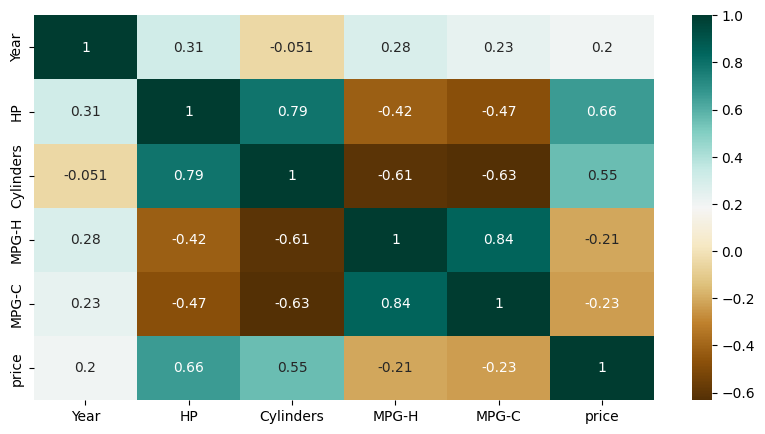

In [61]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,5))
c = numeric_df.corr()
print(c)
sns.heatmap(c,cmap="BrBG",annot=True)

# Scatter plot

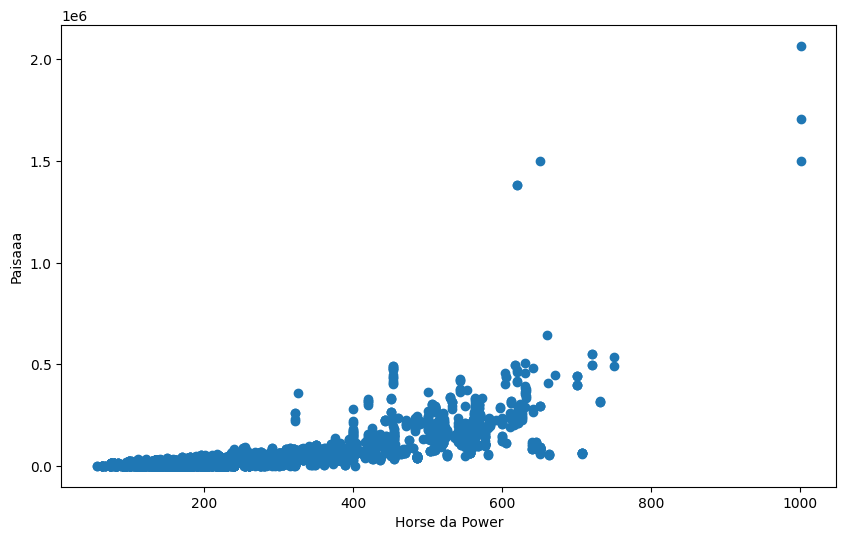

In [63]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['HP'],df['price'])
ax.set_xlabel('Horse da Power')
ax.set_ylabel('Paisaaa')
plt.show()